In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [231]:
mpg_data = pd.read_csv('auto-mpg.csv',index_col='car name')

In [232]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [233]:
mpg_data.shape

(398, 8)

In [234]:
mpg_data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [235]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [236]:
mpg_data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [237]:
mpg_data = mpg_data[mpg_data.horsepower != '?']
mpg_data.horsepower = mpg_data.horsepower.astype('float')
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [238]:
# dataframe size reduced
mpg_data.shape

(392, 8)

In [239]:
mpg_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


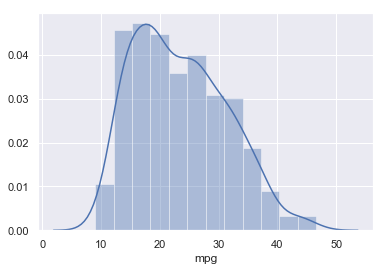

In [240]:
sns.distplot(mpg_data['mpg'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


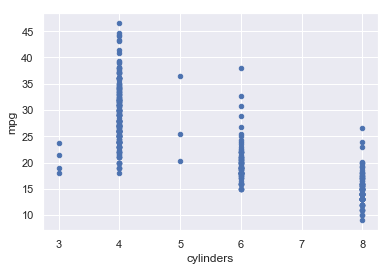

In [241]:
mpg_data.plot(kind='scatter', x='cylinders', y='mpg')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


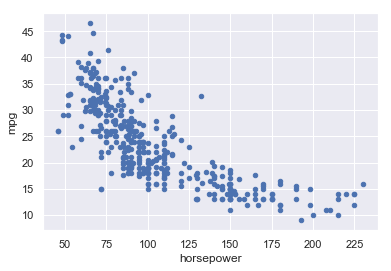

In [242]:
mpg_data.plot(kind='scatter', x='horsepower', y='mpg')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


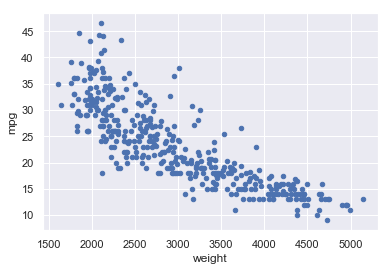

In [243]:
mpg_data.plot(kind='scatter', x='weight', y='mpg')

In [244]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [245]:
data_scale = mpg_data.copy()

In [246]:
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [247]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1


In [248]:
mpg_data['Country_code'] = mpg_data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['Country_code'] = mpg_data.origin.replace([1,2,3],['USA','Europe','Japan'])

In [249]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code
car name,,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,USA
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,USA
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,USA
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,USA
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,USA


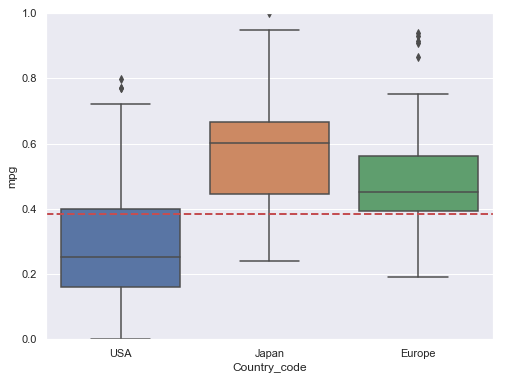

In [250]:
var = 'Country_code'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

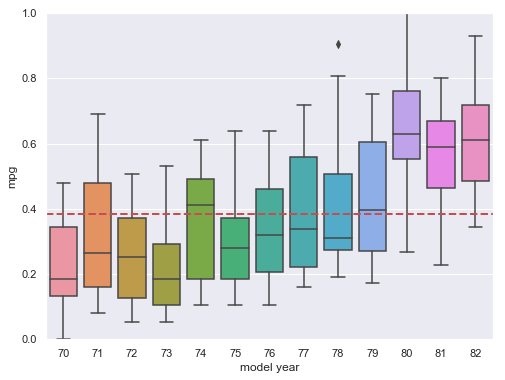

In [251]:
var = 'model year'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

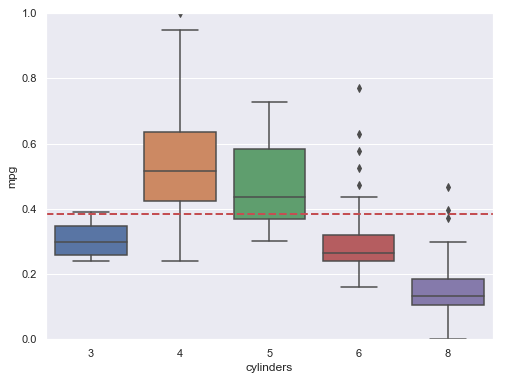

In [252]:
var = 'cylinders'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

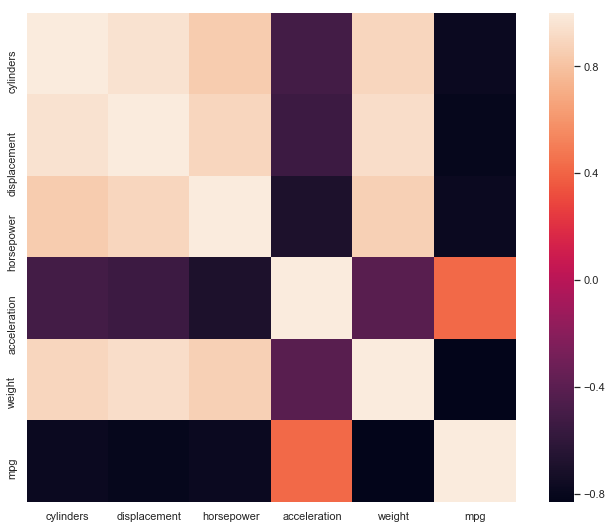

In [253]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','mpg']
corrmat = mpg_data[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [254]:
mpg_data[mpg_data.index.str.contains('subaru')].index.str.replace('(.*)', 'subaru dl')

Index(['subaru dlsubaru dl', 'subaru dlsubaru dl', 'subaru dlsubaru dl',
       'subaru dlsubaru dl'],
      dtype='object', name='car name')

In [255]:
mpg_data['Company_Name'] = mpg_data.index

In [256]:
for item in range(len(mpg_data)):
    mpg_data.ix[item,'Company_Name'] = mpg_data.ix[item,'Company_Name'].split(" ")[0]

In [257]:
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,USA,chevrolet
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,USA,buick
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,USA,plymouth
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,USA,amc
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,USA,ford
ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,1,USA,ford
chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,USA,chevrolet
plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,1,USA,plymouth
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,pontiac


In [258]:
mpg_data['Company_Name'] = mpg_data['Company_Name'].replace(['volkswagen','vokswagen','vw'],'VW')
mpg_data['Company_Name'] = mpg_data['Company_Name'].replace('maxda','mazda')
mpg_data['Company_Name'] = mpg_data['Company_Name'].replace('toyouta','toyota')
mpg_data['Company_Name'] = mpg_data['Company_Name'].replace('mercedes','mercedes-benz')
mpg_data['Company_Name'] = mpg_data['Company_Name'].replace('nissan','datsun')
mpg_data['Company_Name'] = mpg_data['Company_Name'].replace('capri','ford')
mpg_data['Company_Name'] = mpg_data['Company_Name'].replace(['chevroelt','chevy'],'chevrolet')
mpg_data['Company_Name'].fillna(value = 'subaru',inplace=True)

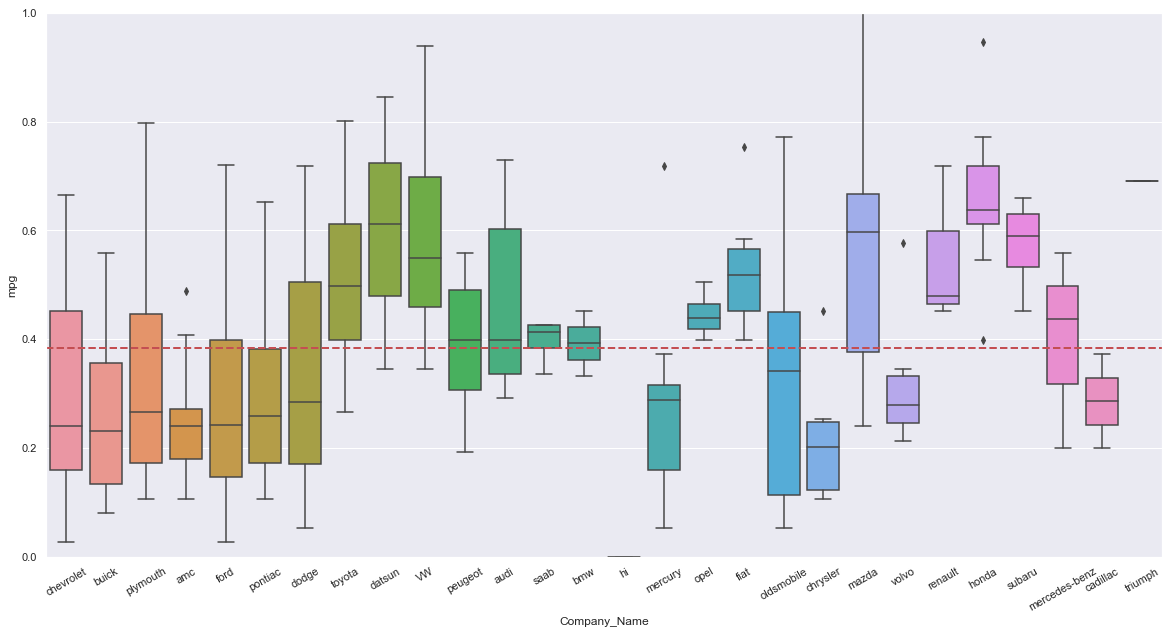

In [259]:
var = 'Company_Name'
data_plt = pd.concat([data_scale['mpg'], mpg_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [261]:
var='mpg'
mpg_data[mpg_data[var]== mpg_data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
hi 1200d,9.0,8,304.0,193.0,4732,18.5,70,1,USA,hi


In [262]:
mpg_data[mpg_data[var]== mpg_data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
mazda glc,46.6,4,86.0,65.0,2110,17.9,80,3,Japan,mazda


In [263]:
var='displacement'
mpg_data[mpg_data[var]== mpg_data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
fiat 128,29.0,4,68.0,49.0,1867,19.5,73,2,Europe,fiat


In [264]:
mpg_data[mpg_data[var]== mpg_data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,pontiac
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,buick
buick electra 225 custom,12.0,8,455.0,225.0,4951,11.0,73,1,USA,buick


In [265]:
var='horsepower'
mpg_data[mpg_data[var]== mpg_data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
volkswagen 1131 deluxe sedan,26.0,4,97.0,46.0,1835,20.5,70,2,Europe,VW
volkswagen super beetle,26.0,4,97.0,46.0,1950,21.0,73,2,Europe,VW


In [266]:
mpg_data[mpg_data[var]== mpg_data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,1,USA,pontiac


In [267]:
var='weight'
mpg_data[mpg_data[var]== mpg_data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
datsun 1200,35.0,4,72.0,69.0,1613,18.0,71,3,Japan,datsun


In [268]:
mpg_data[mpg_data[var]== mpg_data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac safari (sw),13.0,8,400.0,175.0,5140,12.0,71,1,USA,pontiac


In [269]:
var='acceleration'
mpg_data[mpg_data[var]== mpg_data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
plymouth 'cuda 340,14.0,8,340.0,160.0,3609,8.0,70,1,USA,plymouth


In [270]:
mpg_data[mpg_data[var]== mpg_data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
peugeot 504,27.2,4,141.0,71.0,3190,24.8,79,2,Europe,peugeot


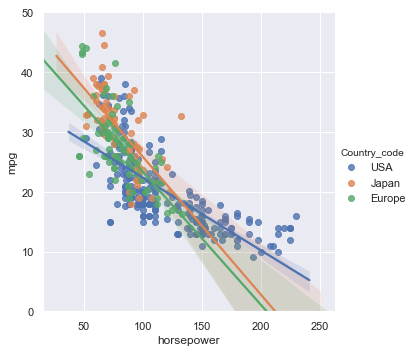

In [271]:
var = 'horsepower'
plot = sns.lmplot(var,'mpg',data=mpg_data,hue='Country_code')
plot.set(ylim = (0,50))

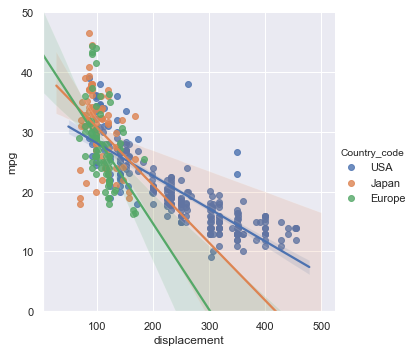

In [272]:
var = 'displacement'
plot = sns.lmplot(var,'mpg',data=mpg_data,hue='Country_code')
plot.set(ylim = (0,50))

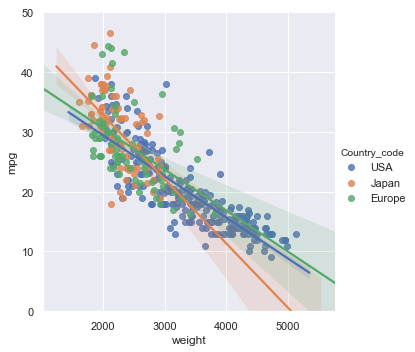

In [273]:
var = 'weight'
plot = sns.lmplot(var,'mpg',data=mpg_data,hue='Country_code')
plot.set(ylim = (0,50))

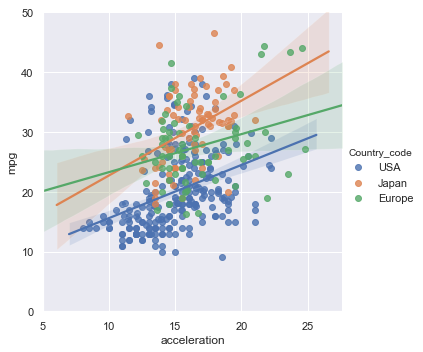

In [274]:
var = 'acceleration'
plot = sns.lmplot(var,'mpg',data=mpg_data,hue='Country_code')
plot.set(ylim = (0,50))

In [275]:
mpg_data['Power_to_weight'] = ((mpg_data.horsepower*0.7457)/mpg_data.weight)

In [276]:
mpg_data.sort_values(by='Power_to_weight',ascending=False ).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name,Power_to_weight
car name,,,,,,,,,,,
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,buick,0.054369
pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,1,USA,pontiac,0.040091
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,pontiac,0.037917
bmw 2002,26.0,4,121.0,113.0,2234,12.5,70,2,Europe,bmw,0.037719
chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,USA,chevrolet,0.037679


In [277]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name,Power_to_weight
car name,,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,USA,chevrolet,0.027666
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,USA,buick,0.033317
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,USA,plymouth,0.032554
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,USA,amc,0.032582
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,USA,ford,0.030269


In [278]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [279]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','origin','model year']
X = pd.DataFrame(mpg_data[factors].copy())
y = mpg_data['mpg'].copy()

In [280]:
X = StandardScaler().fit_transform(X)

In [281]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [282]:
regressor = LinearRegression()

In [283]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [284]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [285]:
y_predicted = regressor.predict(X_test)

In [291]:
y_predicted

array([33.33798459, 15.39478436,  9.81681274, 30.91194082, 22.36465402,
       17.20935957, 13.00776908, 16.5163681 , 24.69190271, 11.36367711,
       19.17211382, 35.99383297, 32.55820304, 29.37843331, 28.27195974,
       31.913566  , 10.70459282,  8.09699491, 28.88471118, 16.440909  ,
       19.69026721, 21.96645157, 30.27277379, 23.59515735, 13.46115152,
       25.08767835, 19.73995298, 15.70552208, 23.84581787, 19.43617074,
       32.69680462, 24.925348  , 22.8087907 , 21.76860853, 29.22098178,
       23.28836758,  4.95621709, 30.50086146, 34.31197321, 25.1758583 ,
       18.82881022, 33.90412178, 16.67516075,  7.27493335, 20.10128277,
       25.41583557, 24.47129653, 16.36910556, 23.11946607, 31.93259945,
        5.118009  , 18.00449239, 10.22423673, 29.03705211, 25.46633227,
       15.64394662, 24.9843402 , 24.73251136, 25.52592164, 31.16871764,
       31.88518732, 27.50914966, 22.9564817 , 28.74400365, 33.01684808,
       22.80706538, 29.17778926, 33.36120124, 10.8884921 , 14.21

In [292]:
y_test

car name
datsun 210                           40.8
amc ambassador brougham              13.0
ford gran torino (sw)                14.0
mazda 626                            31.6
amc gremlin                          18.0
ford f108                            13.0
chevrolet bel air                    15.0
mercedes-benz 280s                   16.5
ford mustang ii 2+2                  25.5
ford ltd                             14.0
ford country squire (sw)             15.5
mazda glc custom                     31.0
volkswagen jetta                     33.0
chevrolet cavalier                   28.0
toyota cressida                      25.4
dodge rampage                        32.0
ford gran torino (sw)                13.0
ford country squire (sw)             13.0
chevrolet chevette                   29.0
chevrolet chevelle malibu classic    16.0
chevrolet nova                       15.0
saab 99e                             25.0
datsun 510                           27.2
pontiac lemans v6        

In [286]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.486729614901562